In [59]:
from pathlib import Path
import sys


def find_repo_root(start: Path | None = None) -> Path:
    p = (start or Path.cwd()).resolve()
    for d in (p, *p.parents):
        if (d / ".git").exists() or (d / "pyproject.toml").exists() or (d / "src").exists():
            return d
    return p  # fallback


repo_root = find_repo_root()
print(repo_root)

# This repo uses a "src layout" (the Python package lives in <repo>/src/qlsas),
# but the repo is not installed as a package. Add <repo>/src to sys.path.
src_dir = repo_root / "src"
if src_dir.exists() and str(src_dir) not in sys.path:
    sys.path.insert(0, str(src_dir))

# Also add the repo root so you can import top-level modules like
# `linear_systems_problems.random_matrix_generator`.
if str(repo_root) not in sys.path:
    sys.path.insert(0, str(repo_root))

/Users/adrianharkness/QCOL_COPT/HHL/QLSAs


In [60]:
from qlsas.qlsa.hhl import HHL
from qlsas.state_prep.prepare import StatePrep
import numpy as np
import math

from linear_systems_problems.random_matrix_generator import generate_problem

In [61]:
prob = generate_problem(n=8, cond_number=5.0, sparsity=0.5, seed=0)
A, b = prob["A"], prob["b"]

A  = A / np.linalg.norm(b)
b = b / np.linalg.norm(b)

print(f"A: {A}")
print(f"b: {b}")


A: [[ 1.25443337e+00 -1.04861115e-01 -4.04793036e-17  1.98064596e-02
  -5.70423574e-16 -2.60849077e-01 -1.51594382e-01 -1.15806717e-17]
 [-1.04861115e-01  2.23466620e+00 -3.37281869e-01 -2.98719127e-01
   5.01421052e-17 -5.97132489e-01  9.94485086e-16  3.34280701e-17]
 [-4.04793036e-17 -3.37281869e-01  1.87410588e+00  4.53911103e-01
  -2.56732302e-01 -1.67140351e-16 -1.83854386e-16  3.06937805e-01]
 [ 1.98064596e-02 -2.98719127e-01  4.53911103e-01  2.34633913e+00
   1.73303040e-01 -1.33712280e-16  7.60488595e-16 -8.02273682e-16]
 [-5.70423574e-16  5.01421052e-17 -2.56732302e-01  1.73303040e-01
   1.02563574e+00 -5.43206139e-17  4.02964939e-16 -6.33144014e-02]
 [-2.60849077e-01 -5.97132489e-01 -1.67140351e-16 -1.33712280e-16
  -5.43206139e-17  1.43280413e+00  4.99649356e-01 -1.67140351e-17]
 [-1.51594382e-01  9.94485086e-16 -1.83854386e-16  7.60488595e-16
   4.02964939e-16  4.99649356e-01  1.04259058e+00 -1.08641228e-16]
 [-1.15806717e-17  3.34280701e-17  3.06937805e-01 -8.02273682e-16


Step 1: 

In [62]:
hhl = HHL(
    A = A, 
    b = b, 
    state_prep_circuit = StatePrep('default'), 
    readout = 'swap_test', 
    swap_test_vector = np.ones(len(b)) / np.linalg.norm(np.ones(len(b))),
    num_qpe_qubits = math.log2(len(b)), 
    t0 = 2 * np.pi)

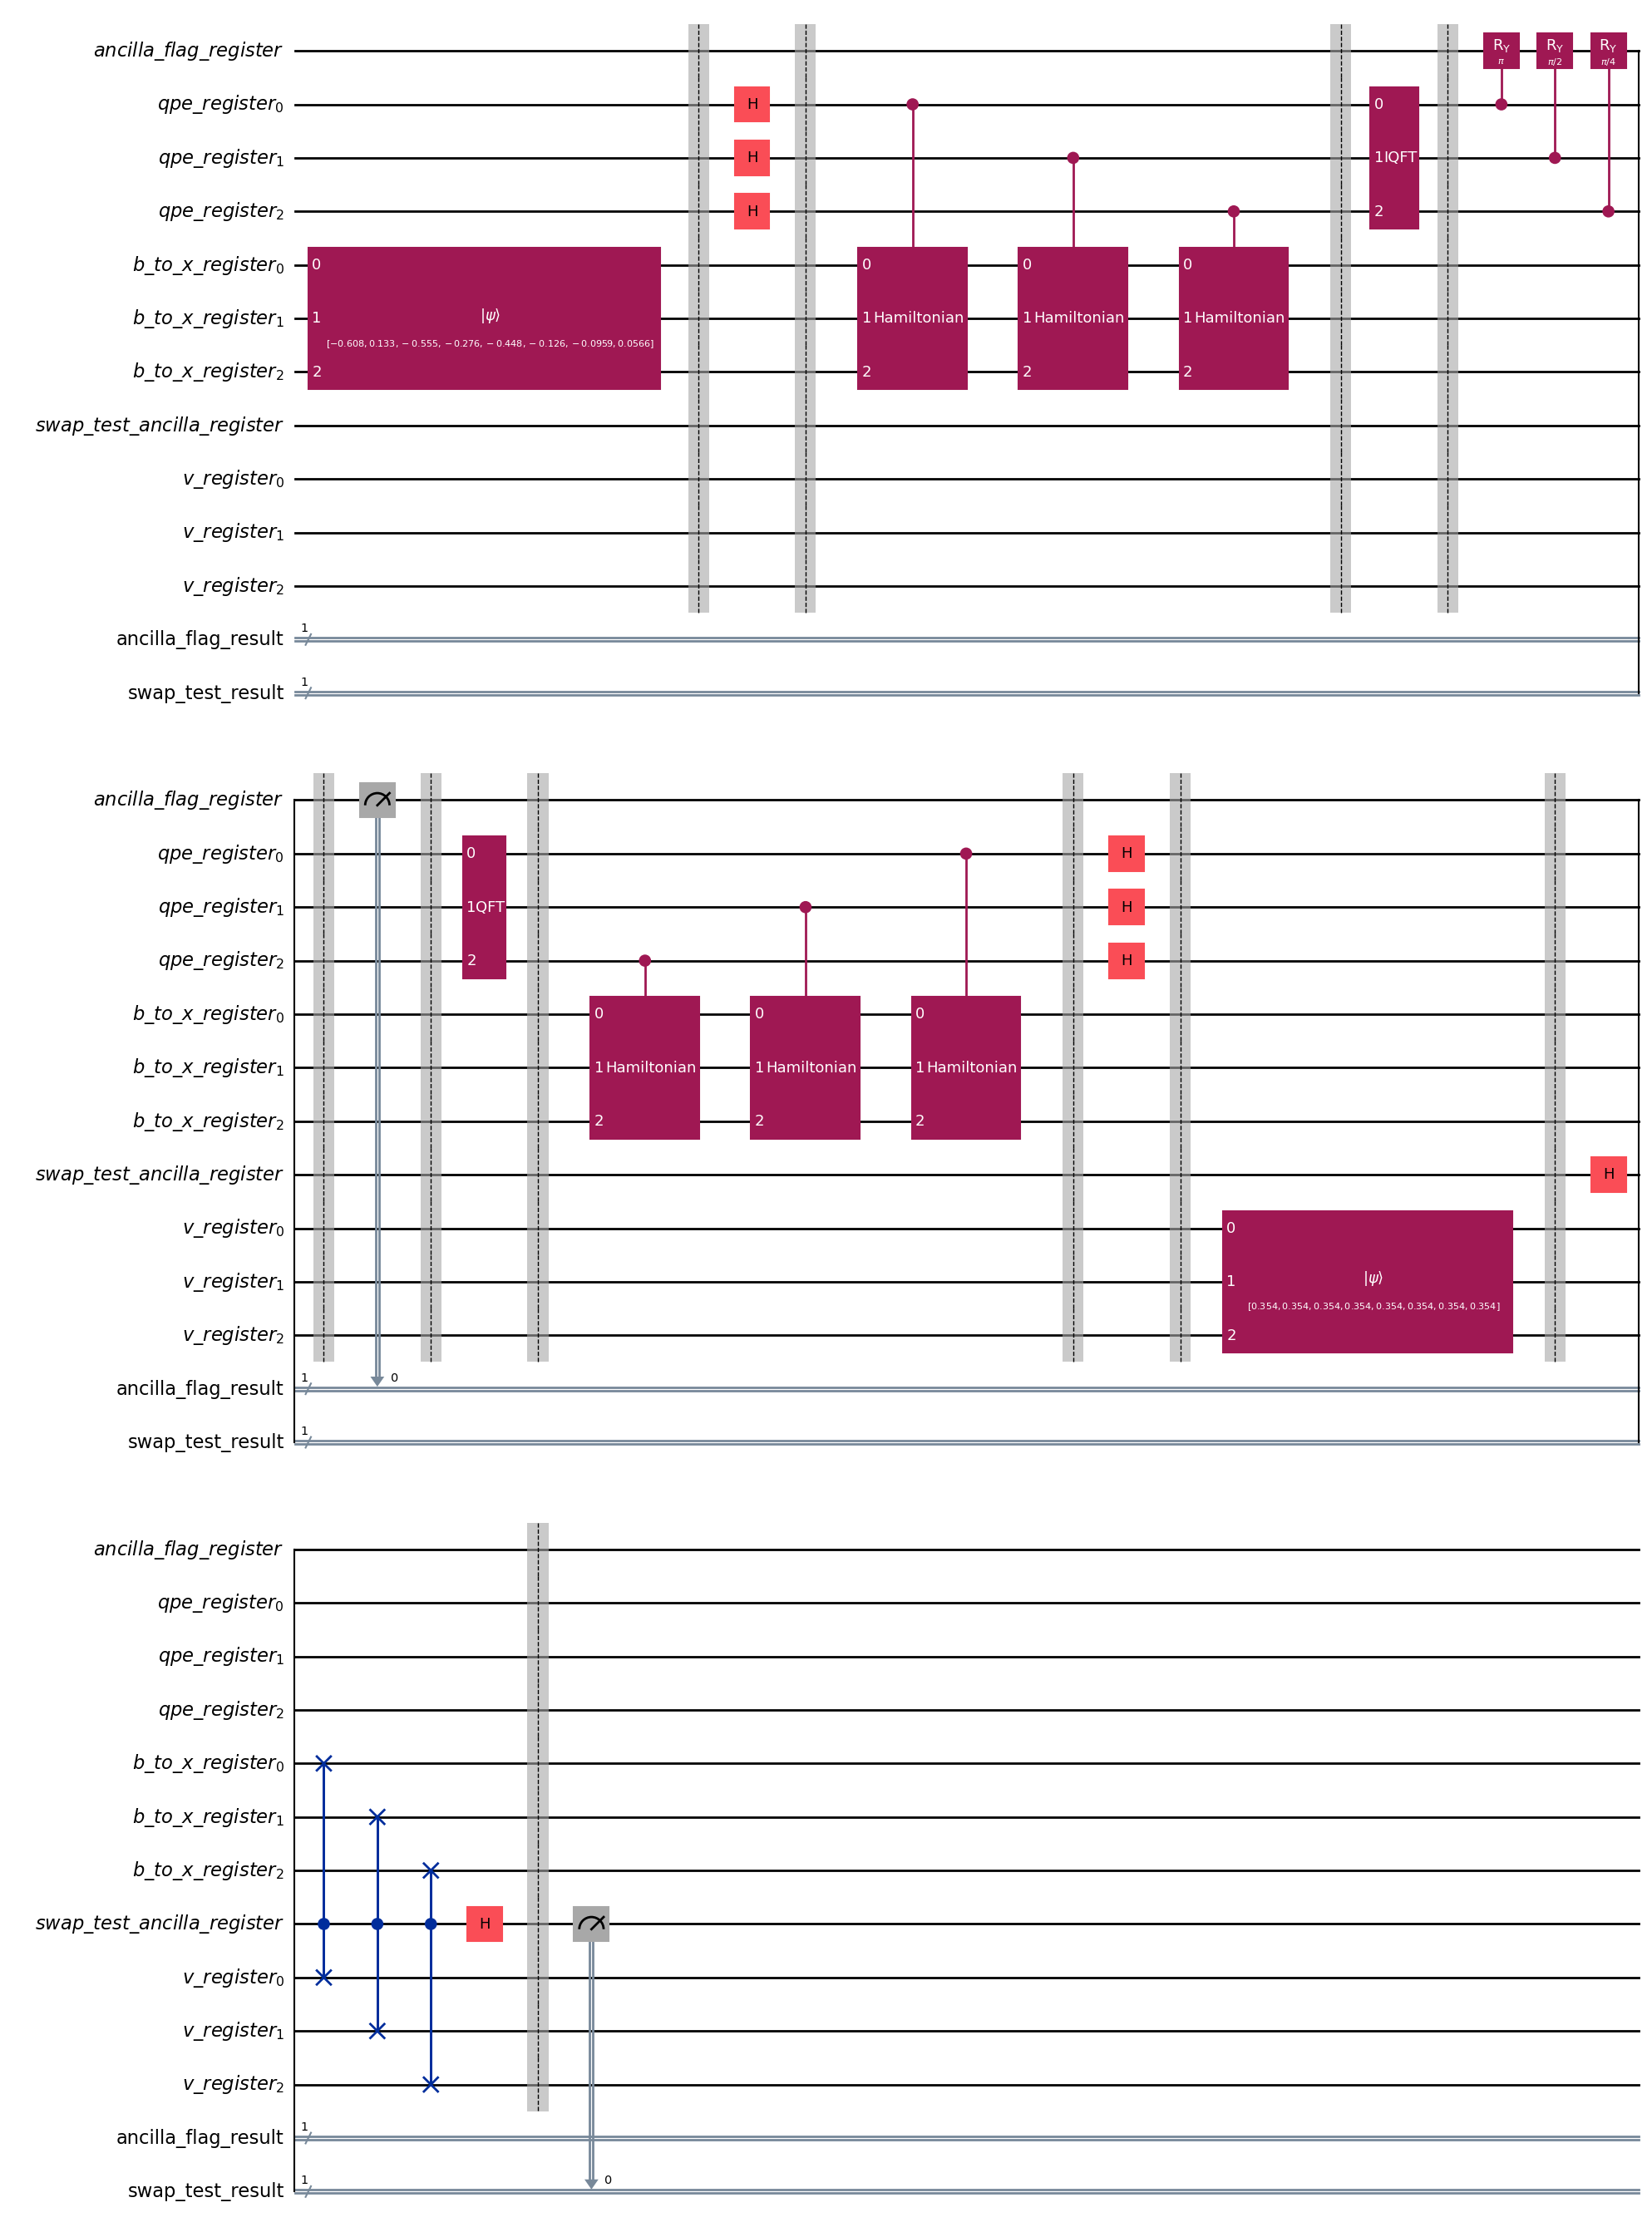

In [63]:
hhl_circuit = hhl.build_circuit()
hhl_circuit.draw(output='mpl')